# Task 2

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application.

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best.


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How many of the loan applicants have dependents based on the historical dataset?

5. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

6. Are applicants with a credit history more likely to default than those who do not have one?

7. Is there a correlation between the applicant's income and the loan amount they applied for?

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [ ]:
# !pip install sweetviz
#uncomment the above if you need to install the library
# !pip install auto-sklearn
#uncomment the above if you need to install the library

In [ ]:
# !pip install --upgrade scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz
#import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One

## EDA

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


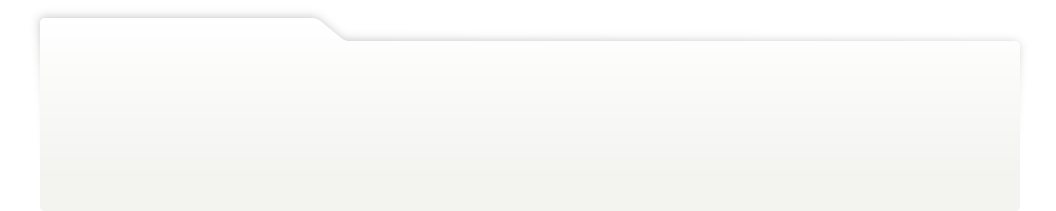
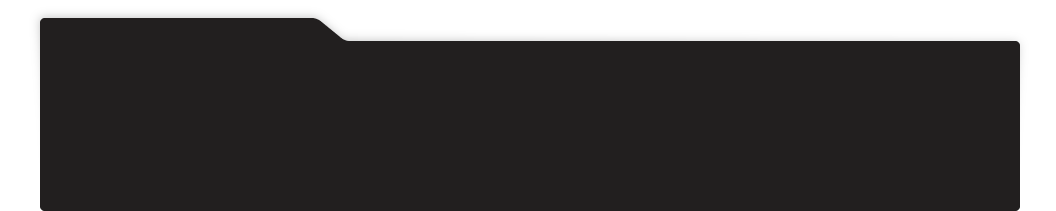
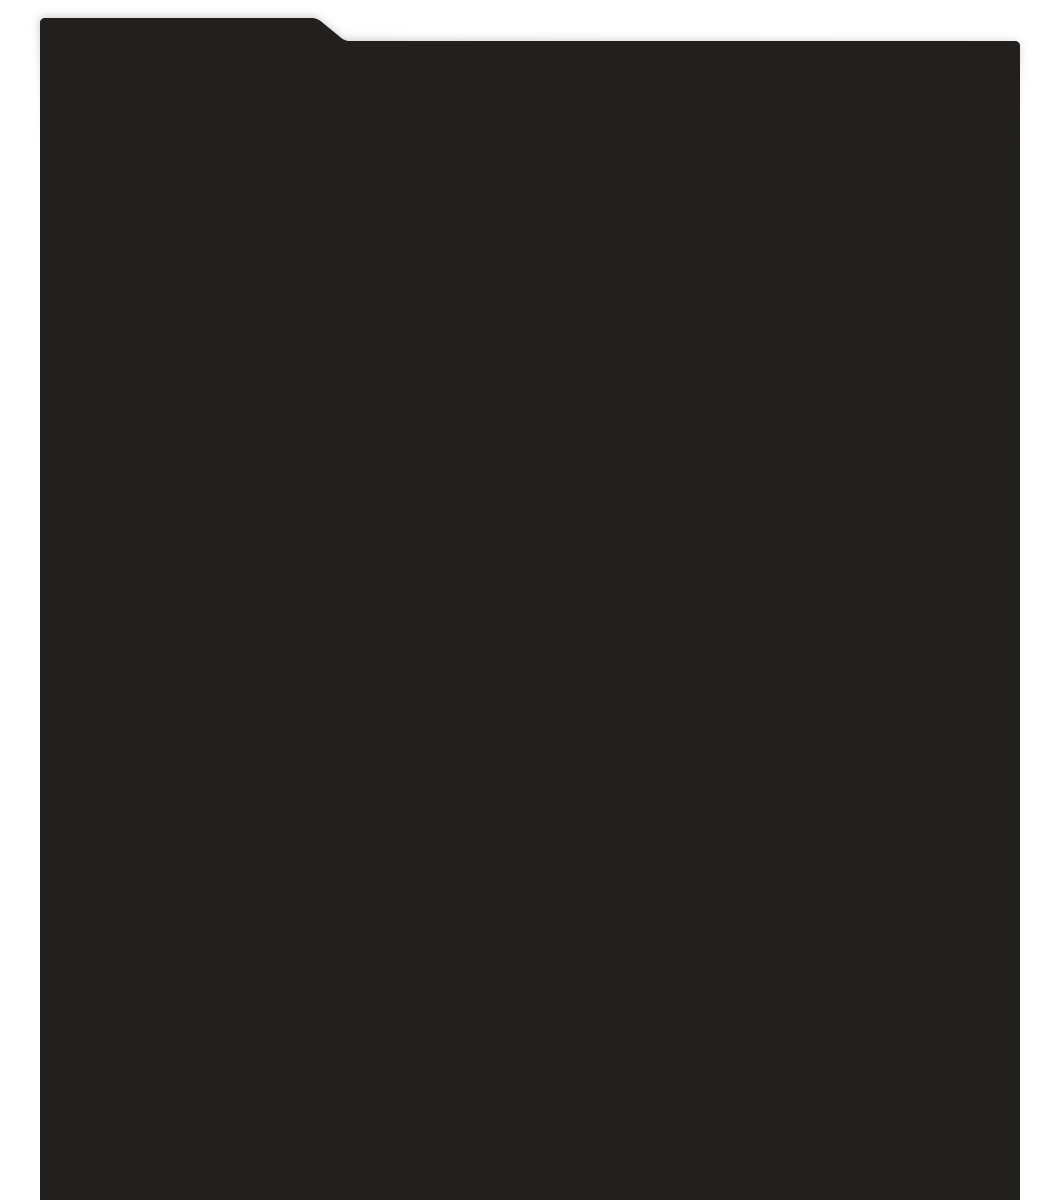
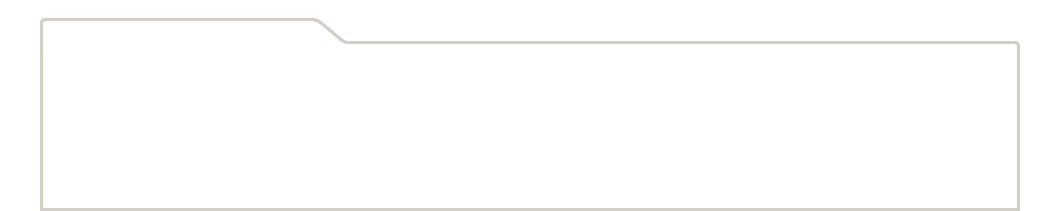
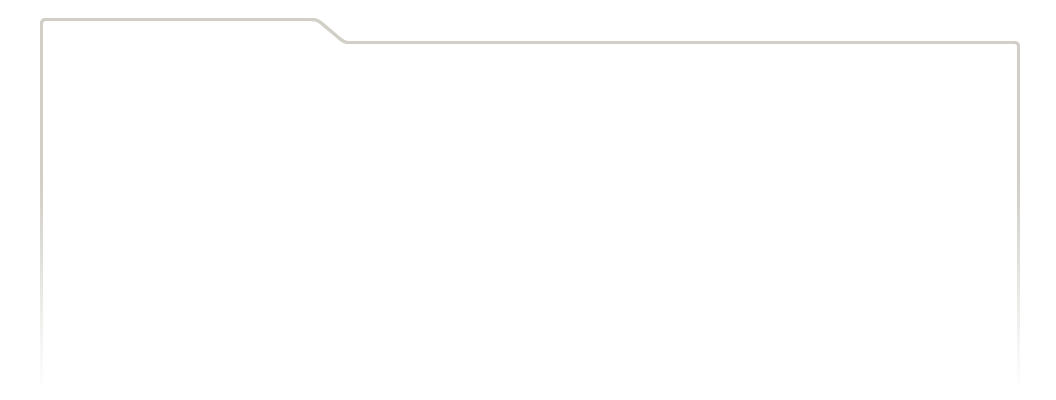
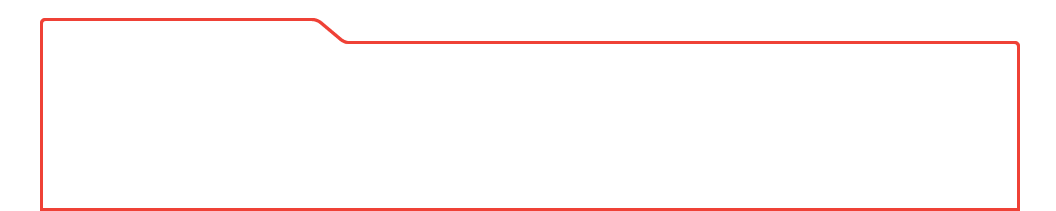
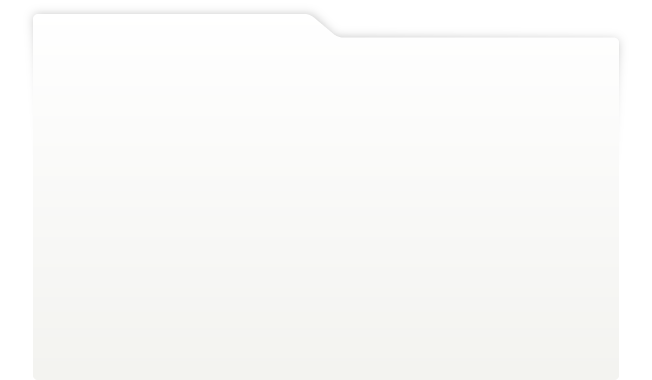
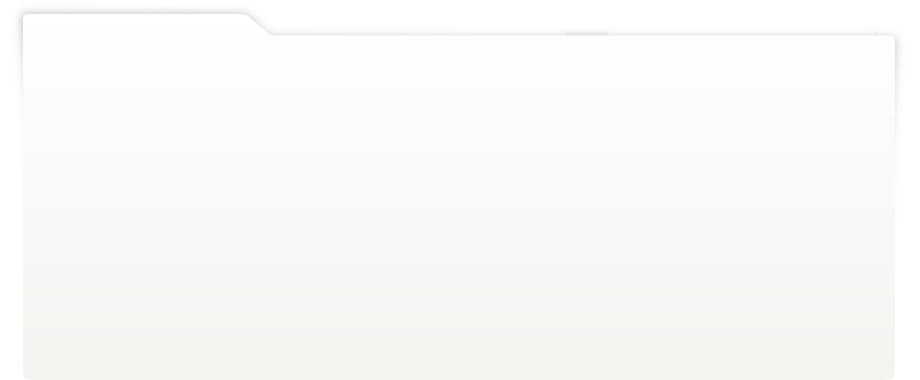
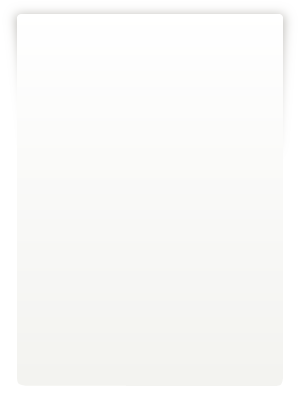
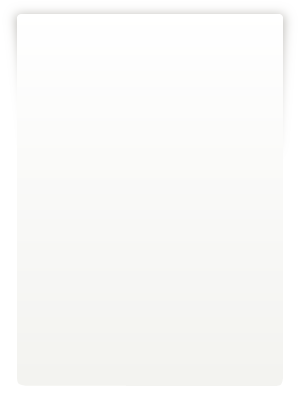
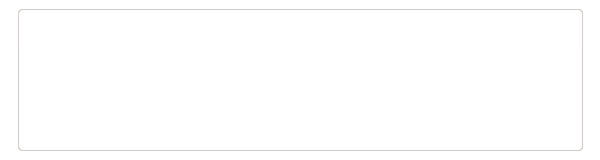
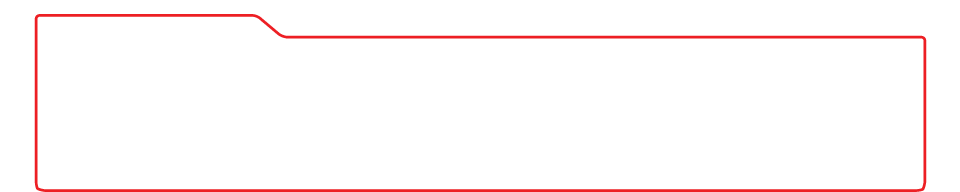
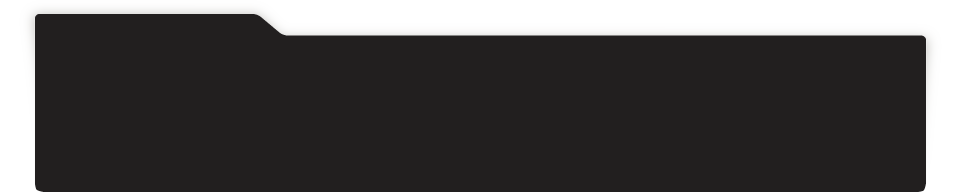
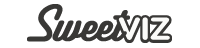
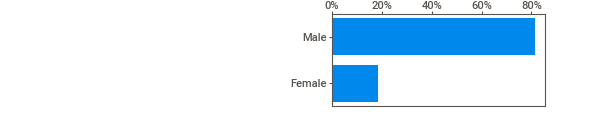
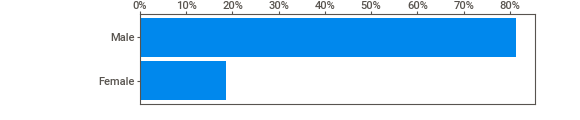
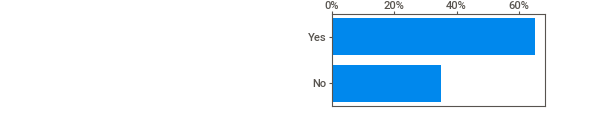
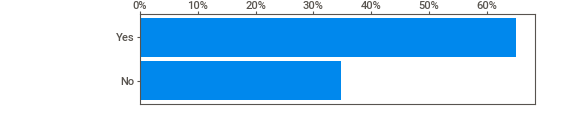
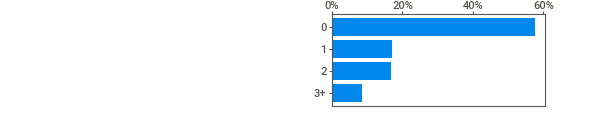
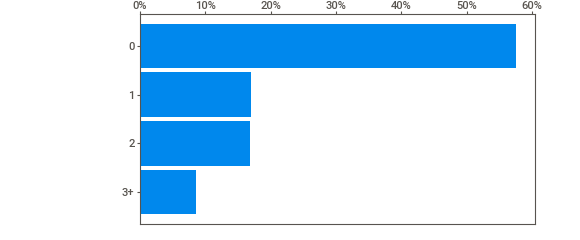
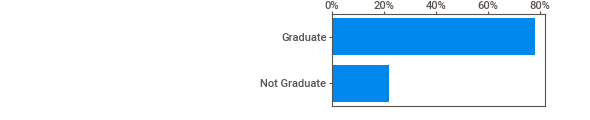
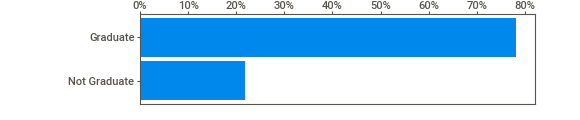
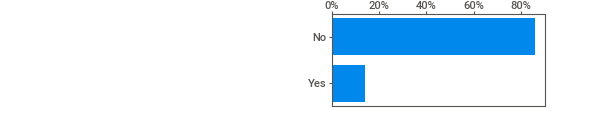
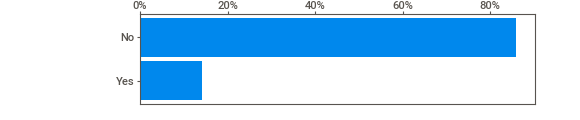
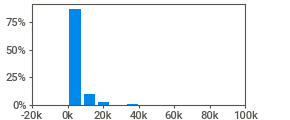
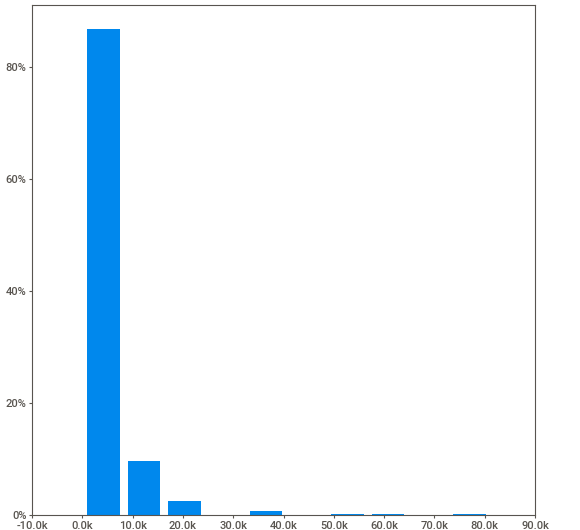
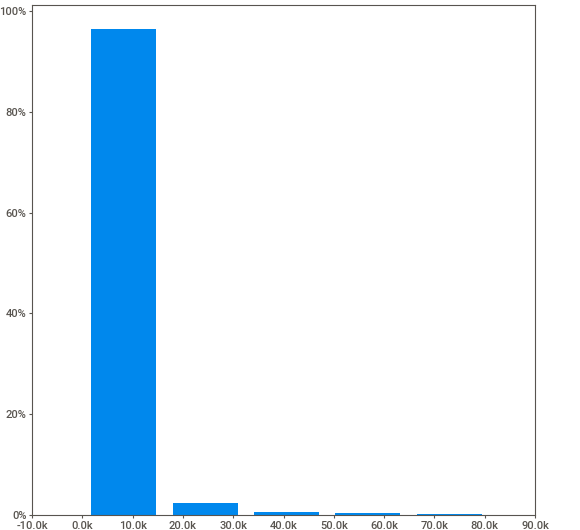
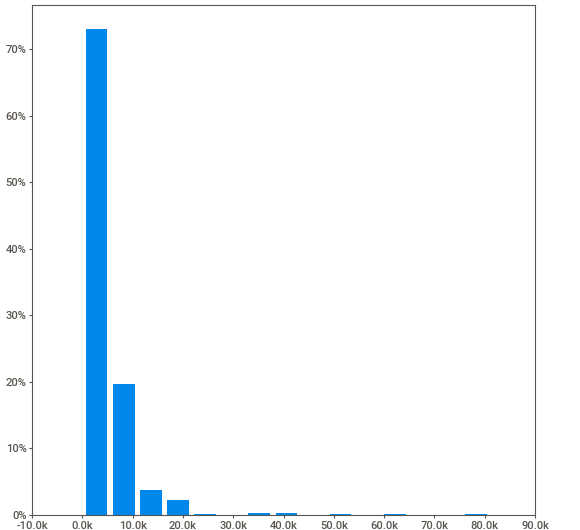
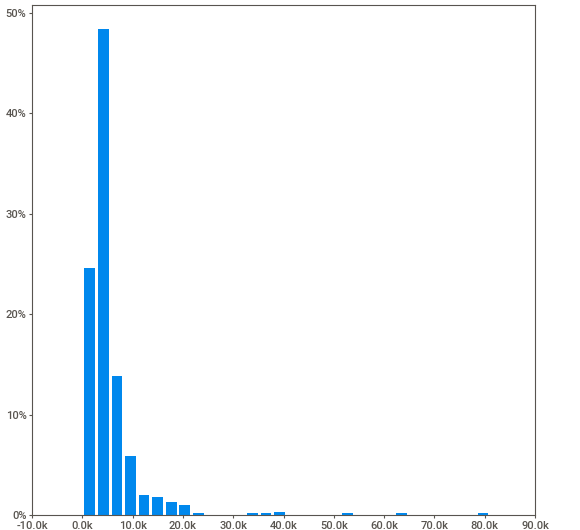
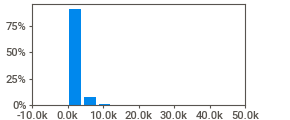
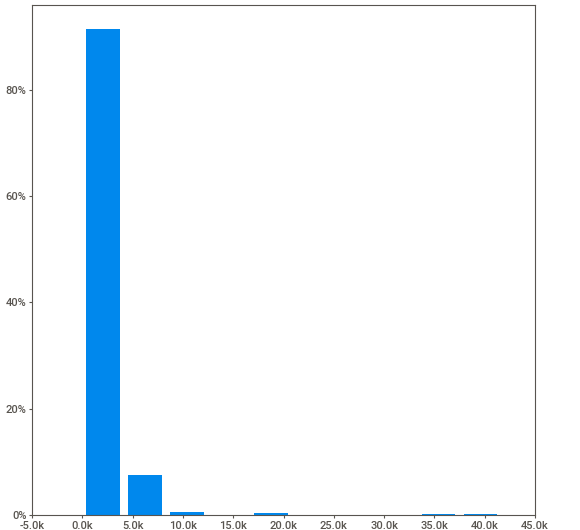
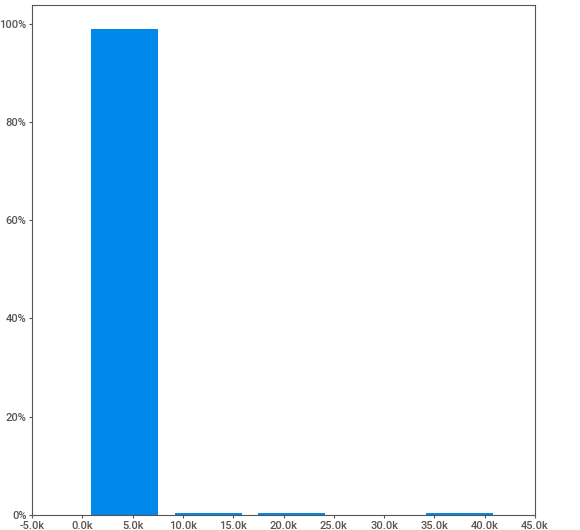
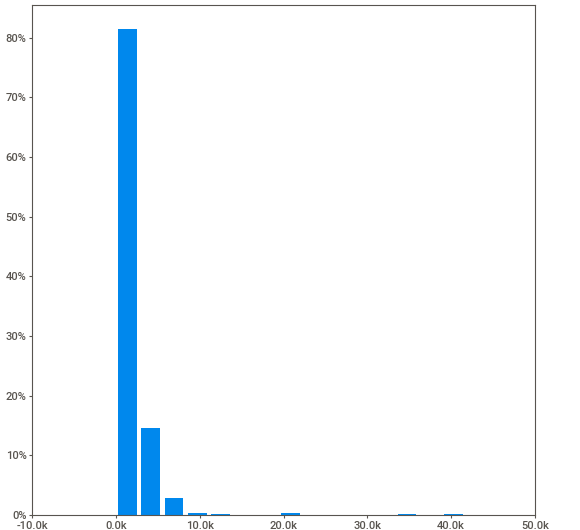
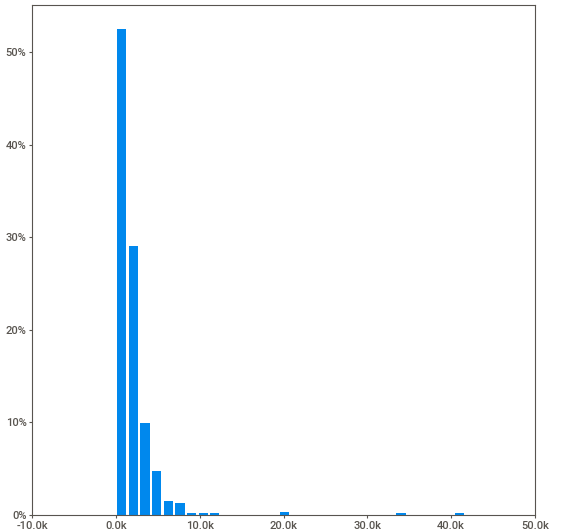
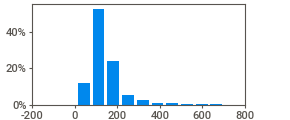
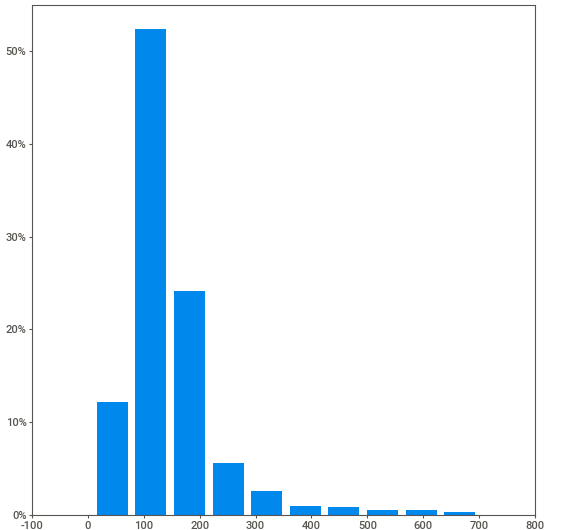
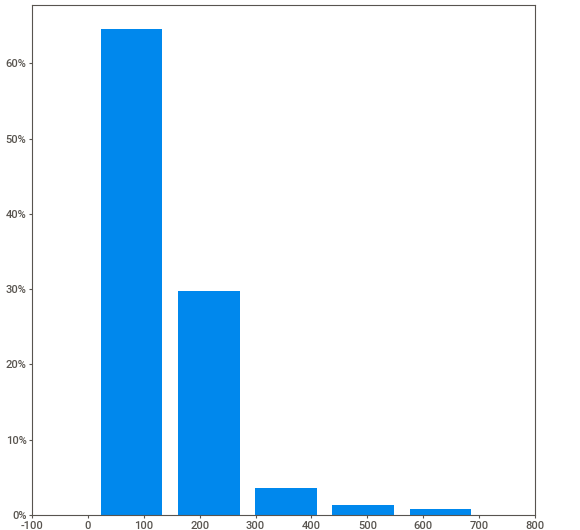
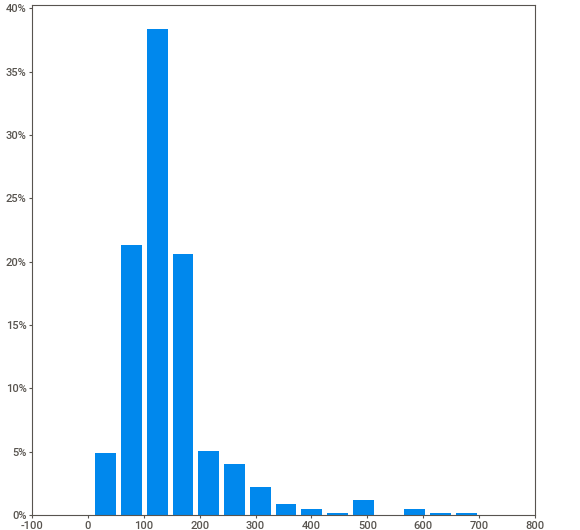
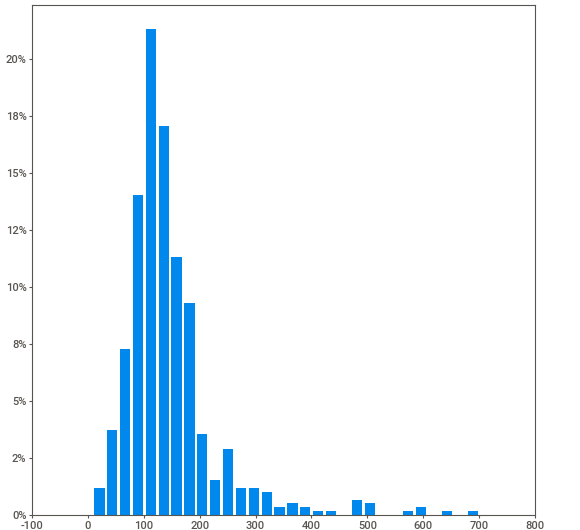
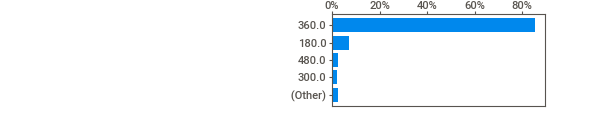
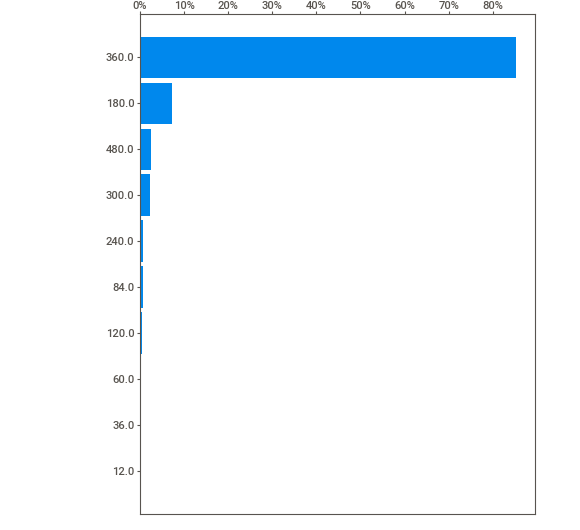
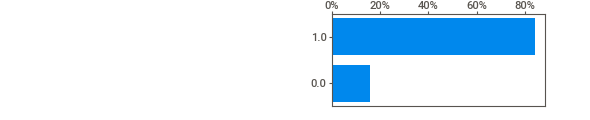
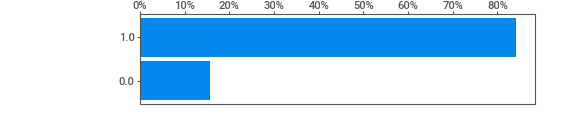
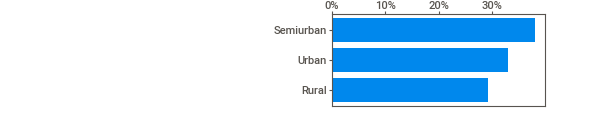
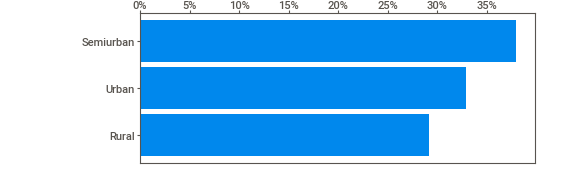
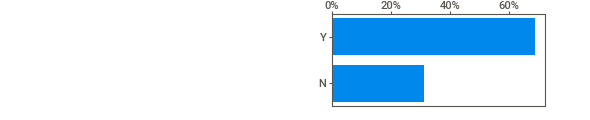
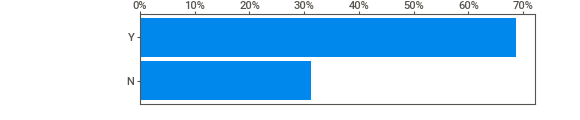
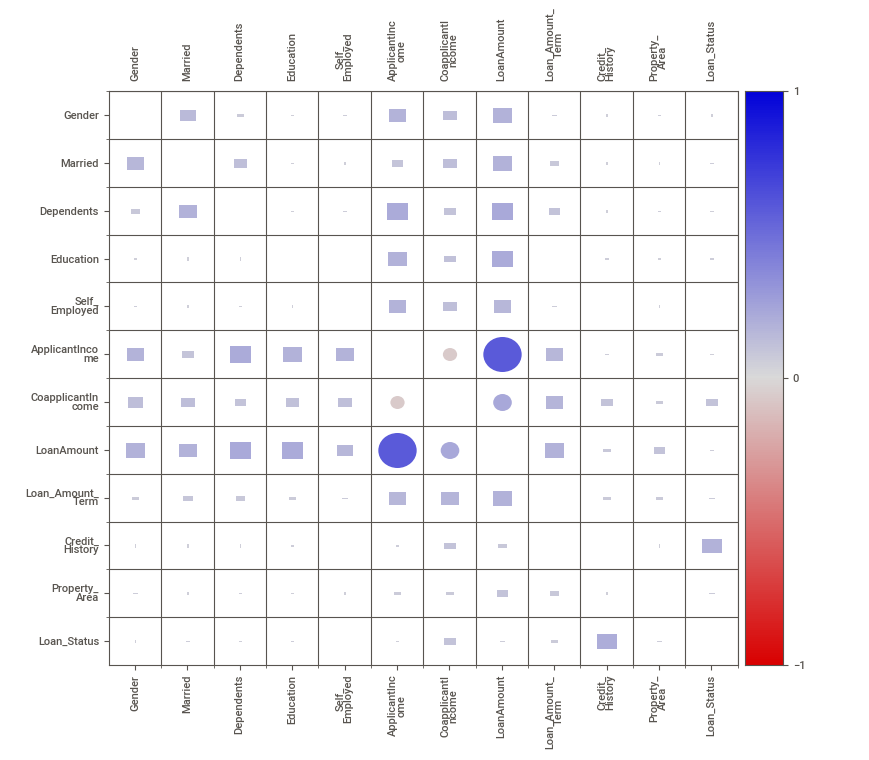
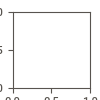

In [ ]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA


In [8]:
print('Shape of train is: ', train.shape)
print('Shape of test is: ', test.shape)

Shape of train is:  (614, 13)
Shape of test is:  (367, 12)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [40]:
train.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [22]:
missing_values_train = train.isnull().sum()
missing_values_train

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<ipython-input-23-0252b0aad7b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_train.index, y=missing_values_train.values, palette="viridis")


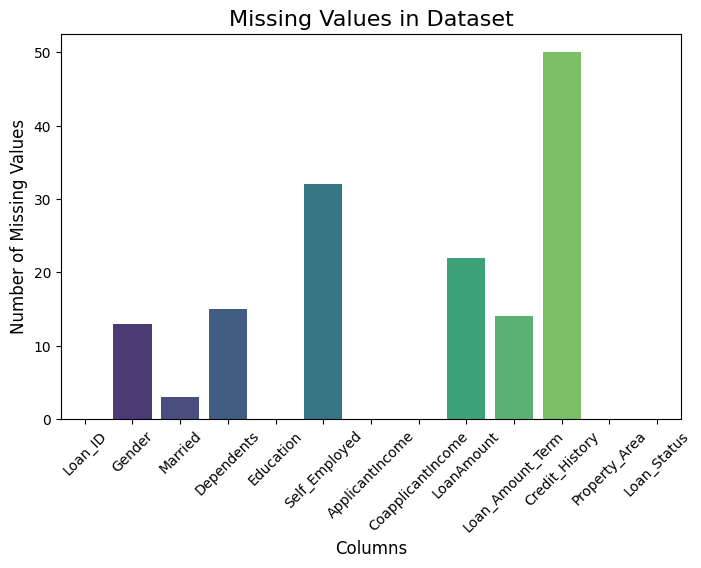

In [23]:
# Plot the missing values of train data
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values_train.index, y=missing_values_train.values, palette="viridis")
plt.title("Missing Values in Dataset", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [25]:
missing_values_test = test.isnull().sum()
missing_values_test

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


<ipython-input-26-21de99f73149>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_test.index, y=missing_values_test.values, palette="viridis")


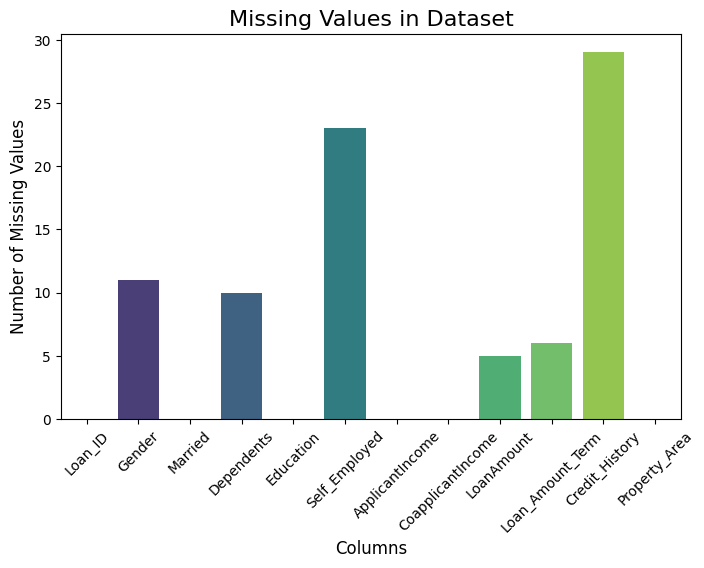

In [26]:
# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values_test.index, y=missing_values_test.values, palette="viridis")
plt.title("Missing Values in Dataset", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

Loan_Status Distribution:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


<ipython-input-27-e3b2b87c157c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette="viridis")


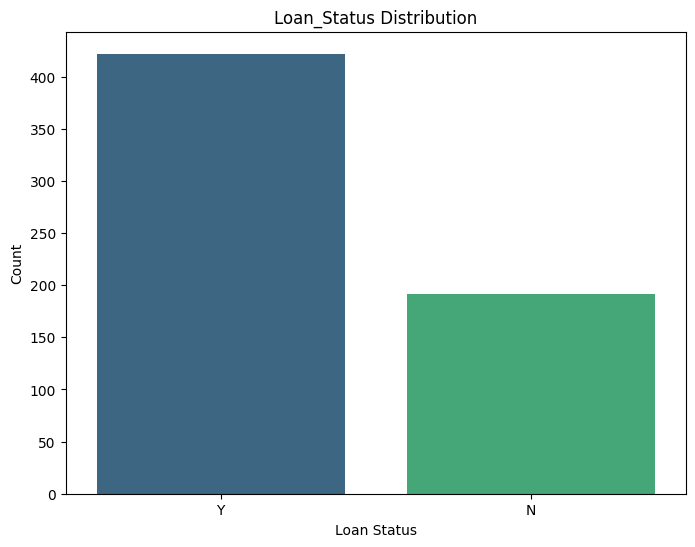

In [27]:
loan_status_counts = train['Loan_Status'].value_counts()

print("Loan_Status Distribution:")
print(loan_status_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette="viridis")
plt.title("Loan_Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


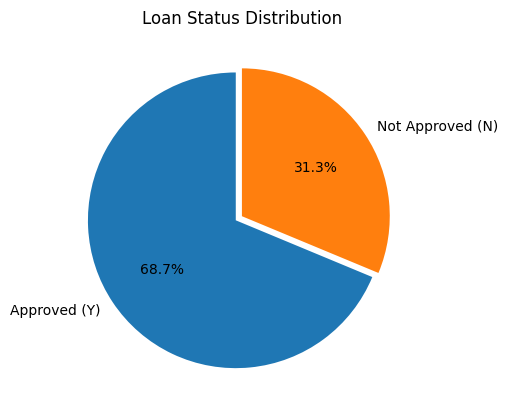

In [36]:
loan_status_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Approved (Y)', 'Not Approved (N)'],
    colors=['#1f77b4', '#ff7f0e'],
    explode=(0.05, 0)
)
plt.title("Loan Status Distribution")
plt.ylabel("")
plt.show()

Dependents Distribution:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-28-ed349e1bbe0e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dependent_counts.index, y=dependent_counts.values, palette="viridis")


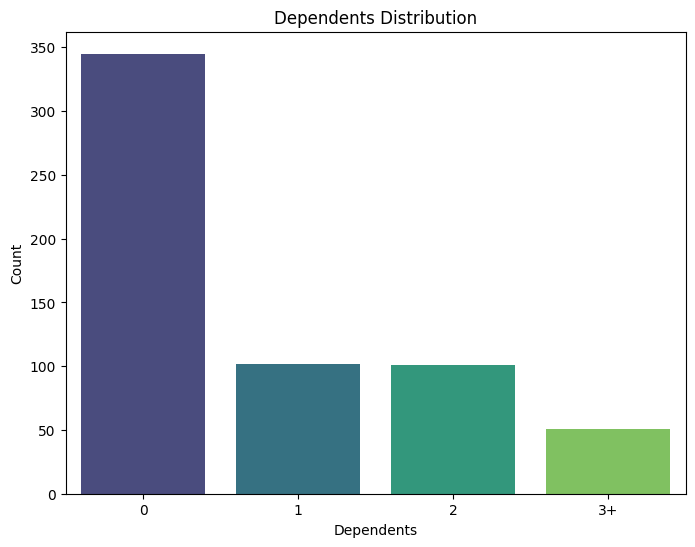

In [28]:
dependent_counts = train['Dependents'].value_counts()

print("Dependents Distribution:")
print(dependent_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=dependent_counts.index, y=dependent_counts.values, palette="viridis")
plt.title("Dependents Distribution")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

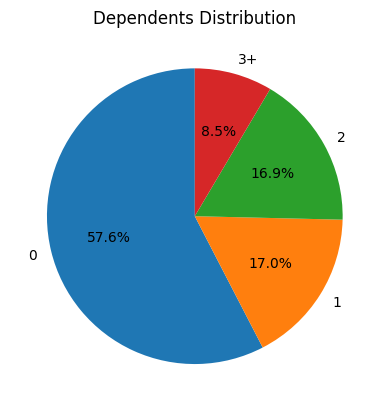

In [32]:
dependent_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Dependents Distribution")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()

In [37]:
# Separate data into employed and self-employed
employed = train[train['Self_Employed'] == 'No']
self_employed = train[train['Self_Employed'] == 'Yes']

# Summary statistics
print("Summary Statistics for Employed:")
print(employed['ApplicantIncome'].describe())

print("\nSummary Statistics for Self-Employed:")
print(self_employed['ApplicantIncome'].describe())

Summary Statistics for Employed:
count      500.00000
mean      5049.74800
std       5682.89581
min        150.00000
25%       2824.50000
50%       3705.50000
75%       5292.75000
max      81000.00000
Name: ApplicantIncome, dtype: float64

Summary Statistics for Self-Employed:
count       82.000000
mean      7380.817073
std       5883.564795
min        674.000000
25%       3452.250000
50%       5809.000000
75%       9348.500000
max      39147.000000
Name: ApplicantIncome, dtype: float64


<ipython-input-38-bfd6e03558ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Self_Employed', y='ApplicantIncome', palette='Set2')


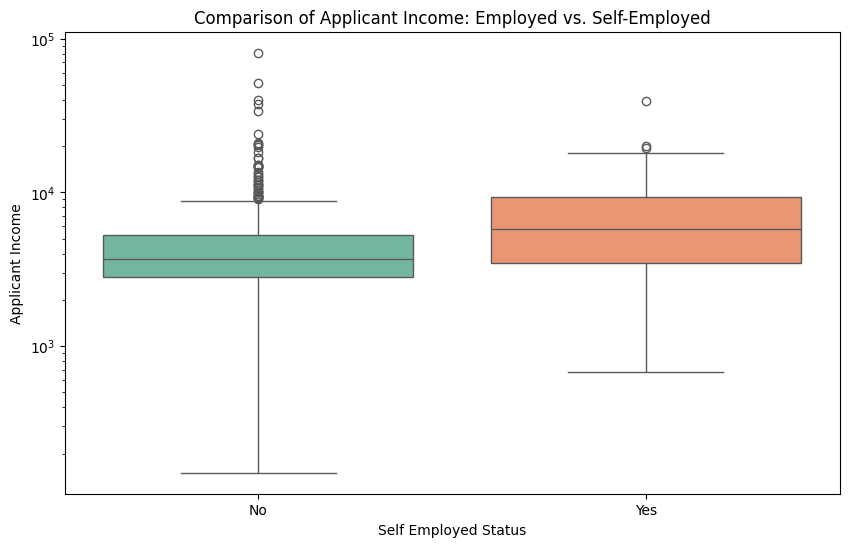

In [38]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Self_Employed', y='ApplicantIncome', palette='Set2')
plt.title("Comparison of Applicant Income: Employed vs. Self-Employed")
plt.xlabel("Self Employed Status")
plt.ylabel("Applicant Income")
plt.yscale('log')  # Log scale for better visualization if there are outliers
plt.show()

<ipython-input-39-145599234599>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train.Self_Employed, y=train.ApplicantIncome, palette="viridis")


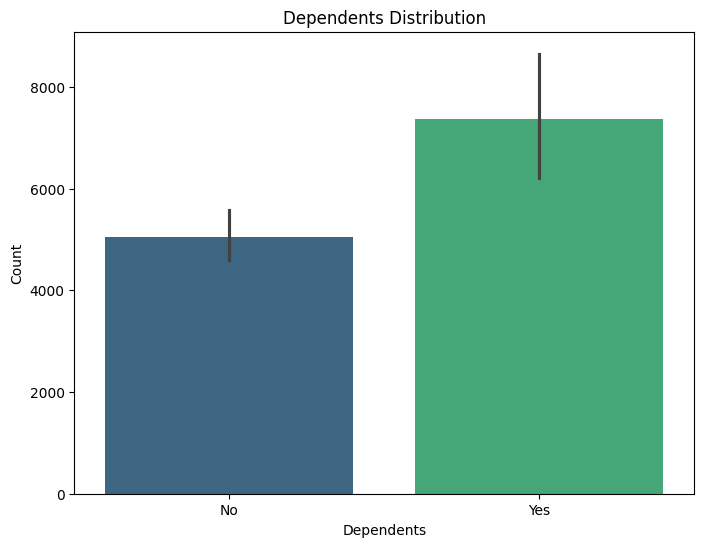

In [39]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=train.Self_Employed, y=train.ApplicantIncome, palette="viridis")
plt.title("Dependents Distribution")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

In [41]:
# Drop rows with missing Credit_History or Loan_Status
filtered_data = train.dropna(subset=['Credit_History', 'Loan_Status'])

# Calculate the counts of Loan_Status for each Credit_History group
credit_history_vs_loan_status = filtered_data.groupby(['Credit_History', 'Loan_Status']).size().unstack()

# Calculate default rates (Loan_Status = 'N') and approval rates (Loan_Status = 'Y')
credit_history_vs_loan_status['Default_Rate'] = credit_history_vs_loan_status['N'] / credit_history_vs_loan_status.sum(axis=1)
credit_history_vs_loan_status['Approval_Rate'] = credit_history_vs_loan_status['Y'] / credit_history_vs_loan_status.sum(axis=1)

print(credit_history_vs_loan_status[['Default_Rate', 'Approval_Rate']])

Loan_Status     Default_Rate  Approval_Rate
Credit_History                             
0.0                 0.921348       0.077846
1.0                 0.204211       0.795447


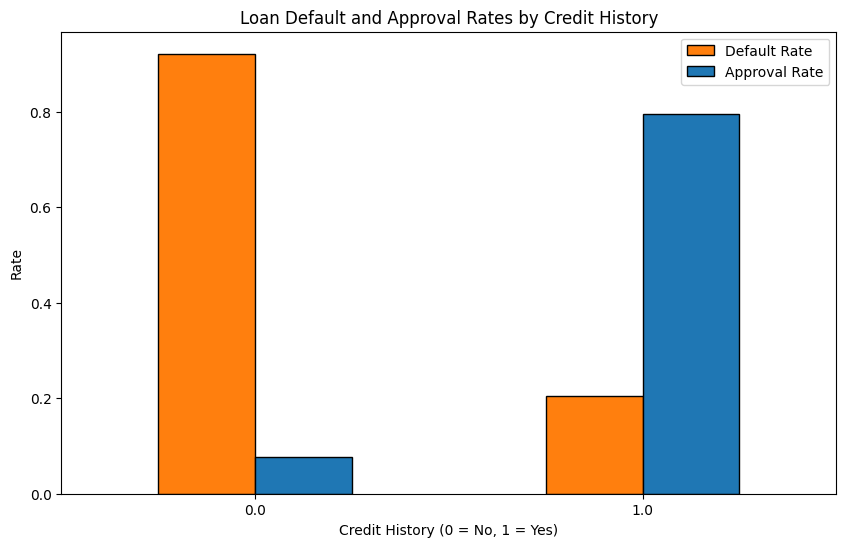

In [42]:
# Plot the default and approval rates
credit_history_vs_loan_status[['Default_Rate', 'Approval_Rate']].plot(
    kind='bar', figsize=(10, 6), color=['#ff7f0e', '#1f77b4'], edgecolor='black'
)
plt.title("Loan Default and Approval Rates by Credit History")
plt.xlabel("Credit History (0 = No, 1 = Yes)")
plt.ylabel("Rate")
plt.xticks(rotation=0)
plt.legend(['Default Rate', 'Approval Rate'])
plt.show()

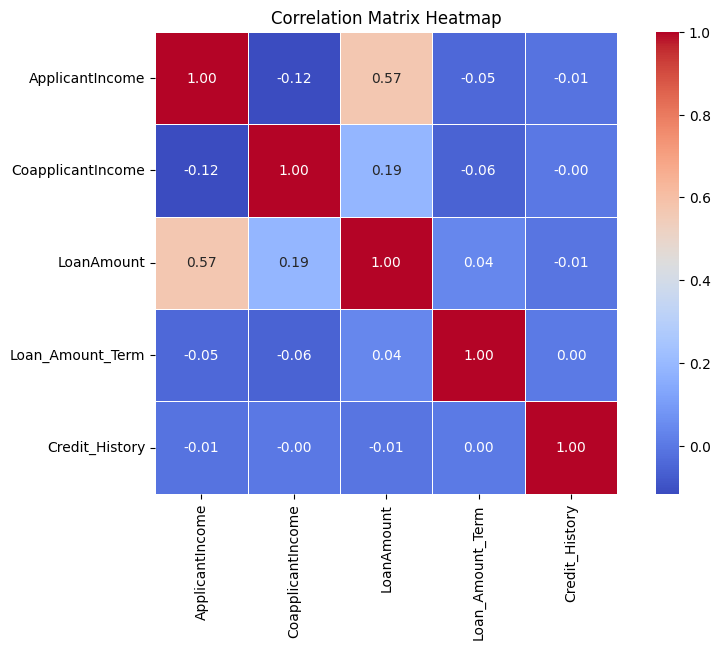

In [45]:
# Select only numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = train[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [46]:
filtered_data = train.dropna(subset=['ApplicantIncome', 'LoanAmount'])

# Calculate the correlation coefficient
correlation = filtered_data[['ApplicantIncome', 'LoanAmount']].corr().iloc[0, 1]
print(f"Correlation between Applicant Income and Loan Amount: {correlation:.2f}")


Correlation between Applicant Income and Loan Amount: 0.57


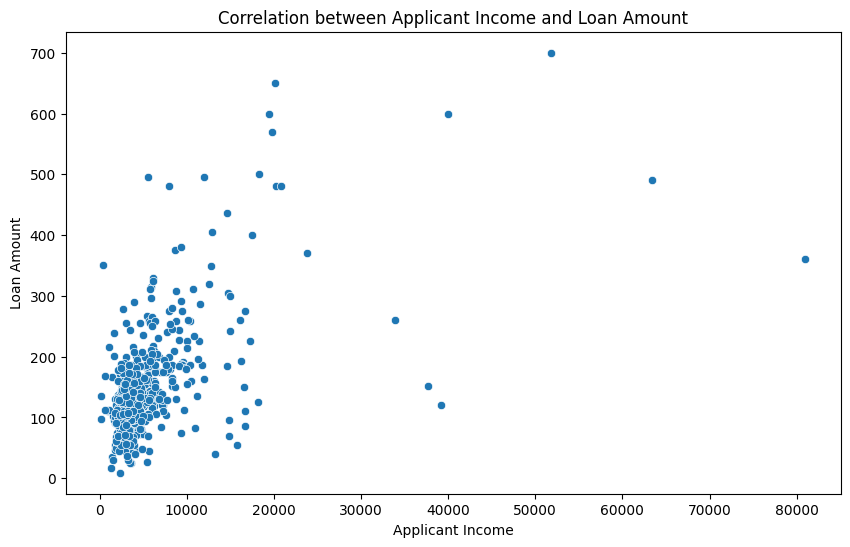

In [47]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='ApplicantIncome', y='LoanAmount', color='#1f77b4')
plt.title("Correlation between Applicant Income and Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()


## Your anwers:

1. There are **614 records** and **13 fields** in train data and the data types of fields are 4 of float64, 1 of int64 and 8 of object, and **367 records** and **12 fields** in test data and the data types of fields are 3 of float64, 2 of int64, 7 of object.

2. Both train and test data **don't contain any duplicates**, however there are many missung values in both of them, like in train data columns as `Gender` contains 13 missing value, `Dependents` contains 15, `Married` contains 3, `Self_Employed` contains 32, `LoanAmount` contains 22, `Loan_Amount_Term` contains 14, and finally `Credit_History` contains 50,
in the test dataset i found that there is `missing values` in some columns like `Gender` contains 11, `Dependents` contains 10, `Self_Employed` contains 23, `LoanAmount` contains 5, `Loan_Amount_Term` contains 6, `Credit_History` contains 29.


3. The loan status distribution is **422 for Y and 192 of N** which means **68.7% of Y and 31.3% of N**.

4. The number of loan applications that have dependents is **345 of 0 dependents, 102 of 1 dependents, 101 of 2 dependents, and 51 of +3 dependents** which means **57.6% of 0 dependents, 17% of 1 dependents, 16.9% of 2 dependents, 8.5% of +3 dependents**.

5. There are **82 of self employed that get average income 7380**, and there are **500 of employed normally that get average income 5050**, and this means that the self employed people get mor income.

6. No, The applicants with no credit history more likely to default than those who have one, as ones that **having credit history** have  percentage of being **defaulted is 20%** while the percentage of being **approved is 80%**, and the ones **with no credit history** have percentage of being **defaulted is 93%** while the percentage of being **approved is 7%**.

7. The correlation between the applicant's income and the loan amount is **0.57**, indicating a **moderate positive relationship**. This suggests that as an applicant's income increases, the loan amount they apply for tends to increase as well, though other factors likely influence the loan amount.

# Part Two

## Auto ML wth autosklearn


In [ ]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [ ]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML sklearn

### Data Preparation

In [48]:
# Matrix of features


df = train[['Education',
            'Property_Area',
            'ApplicantIncome',
            'CoapplicantIncome',
            'LoanAmount',
            'Loan_Amount_Term',
            'Credit_History']]


### Include Numerical Features Here ###
# For numerical features, impute with the mean value
imputer_num = SimpleImputer(strategy='mean')
df[['ApplicantIncome','CoapplicantIncome',
    'LoanAmount','Loan_Amount_Term','Credit_History']] = imputer_num.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome',
                                                       'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

### Handle Missing Values Here ###
imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Education', 'Property_Area']] = imputer_cat.fit_transform(df[['Education', 'Property_Area']])

### Scale Here ###
# Scaling numerical features using StandardScaler
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-48-29f12597fecd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['ApplicantIncome','CoapplicantIncome',
<ipython-input-48-29f12597fecd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Education', 'Property_Area']] = imputer_cat.fit_transform(df[['Education', 'Property_Area']])
<ipython-input-48-29f12597fecd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [49]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
FixedThresholdClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
TunedThresholdClassifierCV
VotingClassifier


In [53]:
#using SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# train
clf_svc = SVC() #change model here
clf_svc.fit(X_train, y_train)

# predict
predictions_clf_scv = clf_svc.predict(X_test)

In [54]:
print('Model Accuracy:', accuracy_score(predictions_clf_scv, y_test))

Model Accuracy: 0.7723577235772358


In [55]:
print(confusion_matrix(predictions_clf_scv, y_test))

[[18  3]
 [25 77]]


In [56]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
# train
clf_RF = RandomForestClassifier() #change model here
clf_RF.fit(X_train, y_train)

# predict
predictions_clf_RF = clf_RF.predict(X_test)

In [57]:
print('Model Accuracy:', accuracy_score(predictions_clf_RF, y_test))

Model Accuracy: 0.7398373983739838


In [59]:
print(confusion_matrix(predictions_clf_RF, y_test))

[[18  7]
 [25 73]]


In [60]:
#Using Naive Baies
from sklearn.naive_bayes import GaussianNB
# train
clf_NB = GaussianNB() #change model here
clf_NB.fit(X_train, y_train)

# predict
predictions_clf_NB = clf_NB.predict(X_test)

In [61]:
print('Model Accuracy:', accuracy_score(predictions_clf_NB, y_test))

Model Accuracy: 0.7804878048780488


In [62]:
print(confusion_matrix(predictions_clf_NB, y_test))

[[18  2]
 [25 78]]


In [63]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
# train
clf_DT = DecisionTreeClassifier() #change model here
clf_DT.fit(X_train, y_train)

# predict
predictions_clf_DT = clf_DT.predict(X_test)

In [64]:
print('Model Accuracy:', accuracy_score(predictions_clf_DT, y_test))

Model Accuracy: 0.7317073170731707


In [65]:
print(confusion_matrix(predictions_clf_DT, y_test))

[[25 15]
 [18 65]]


I try to use some algorithms of ML and this is the accuracy that i get from each one:

*   SVC : 0.7723577235772358
*   Random Forest : 0.7398373983739838
*   Gausian Naive Baies : 0.7804878048780488
*   Decision Tree : 0.7317073170731707
it means that the best one from this algorithms is **GausianNB**

